# Introduction to Non-contextual Embeddings: Word2vec and GloVe

### 1.Loading and Demo of word2vec embeddings using Gensim

The idea behind Word2Vec is pretty simple. We’re making an assumption that the **meaning of a word can be inferred by the company it keeps**. This is analogous to the saying, “*show me your friends, and I’ll tell who you are*”. For example, the words shocked, appalled and astonished are usually used in a similar context.

In this hands-on session, you will learn how to use the [**Gensim**](https://radimrehurek.com/gensim/) implementation of Word2Vec (in python) and actually get it to work.

In [1]:
import gensim
from gensim.models import Word2Vec
import gensim.downloader

In [2]:
#Gensim comes with several already pre-trained models, in the Gensim-data repository
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [3]:
# Download the "glove-twitter-25" embeddings
glove_vectors = gensim.downloader.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [4]:
glove_vectors.most_similar('twitter')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('facebook', 0.9480051398277283),
 ('tweet', 0.9403422474861145),
 ('fb', 0.9342358708381653),
 ('instagram', 0.9104823470115662),
 ('chat', 0.8964964747428894),
 ('hashtag', 0.8885936141014099),
 ('tweets', 0.8878157734870911),
 ('tl', 0.8778461813926697),
 ('link', 0.877821147441864),
 ('internet', 0.8753897547721863)]

### 2.Training the Word2Vec model using gensim

To train a Word2Vec model you need to pass all the documents. So, we are essentially passing a list of strings where each string within the main list contains the document. Gensim implementation needs vocabulary. And by vocabulary, I mean a set of unique words.

After building the vocabulary, we just need to call `train(...)`

*Behind the scenes*, we are actually training a **neural network with a single hidden layer**. But, we are actually not going to use the neural network after training. Instead, the goal is to learn the weights of the hidden layer. These weights are essentially the word vectors that we’re trying to learn.

The word2vec algorithms include skip-gram and CBOW models, using either hierarchical softmax or negative sampling.

**Reference:** 
1. Tomas Mikolov et al: Efficient Estimation of Word Representations in Vector Space, 
2. Tomas Mikolov et al: Distributed Representations of Words and Phrases and their Compositionality.
3. https://rare-technologies.com/word2vec-tutorial/

In [5]:
from gensim.test.utils import common_texts
print(type(common_texts))
print(len(common_texts))
print(common_texts)

<class 'list'>
9
[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


In [6]:
print("Training Started...")
## First define the model
model = Word2Vec(sentences=common_texts, size=100, window=5, min_count=1, workers=4)
#save Model
model.save("word2vec.model")
#load model
model = Word2Vec.load("word2vec.model")
#train the mdoel
model.train(common_texts, total_examples=1, epochs=1)
#model.train([["hello", "world"]], total_examples=1, epochs=1)
print("Training complete...")

Training Started...
Training complete...


#### Understanding the parameters

> **size**: The size of the dense vector to represent each token (here word). If you have very limited data, then size should be a much smaller value. If you have lots of data, its good to experiment with various sizes. The standard size is usually `300`.

> **window**: The maximum distance between the target word and its neighboring words when considering context. If your neighbor's position is greater than the maximum window width to the left and the right, then, some neighbors are not considered as being related to the target word. In theory, a smaller window should give you terms that are more related. If you have lots of data, then the window size should not matter much, as long as its a decent sized window.

> **min_count**: Minimium frequency count of words. The model would ignore words that do not statisfy the min_count. Extremely infrequent words are usually unimportant, so its best to get rid of those. Unless your dataset is really tiny, this does not really affect the model.

> **workers**: How many threads to use behind the scenes?

**Note:** You can experiment with these parameter values. Specially experiment with `size` parameter.

There are more ways to train word vectors in Gensim than just Word2Vec. See also Doc2Vec, FastText and wrappers for VarEmbed and WordRank. Document link: https://radimrehurek.com/gensim/models/word2vec.html


In [7]:
#The trained word vectors are stored in a KeyedVectors instance, as model.wv
vector = model.wv['computer']
print(vector)

[ 4.0101653e-04  1.5894538e-03 -9.8039466e-04 -3.3887103e-03
 -1.9537681e-03  3.5849120e-03  3.7721652e-03  2.5562358e-03
 -2.2605383e-04 -2.0106868e-03  1.2040117e-03 -2.6394401e-03
 -8.4594759e-04  2.4813975e-04 -4.0330598e-03  5.2363798e-04
  1.7220217e-03 -1.3483741e-03  2.4560625e-03  8.6993090e-04
 -1.7249836e-03 -1.6741829e-03  1.5219879e-04 -4.9130050e-03
  4.4380291e-03 -1.7423562e-03  4.1459175e-03  3.2520778e-03
 -2.2277322e-03 -4.1870186e-03 -2.9899811e-04  3.4147447e-03
  2.5484588e-03  2.7134439e-03 -8.3209411e-04 -3.5949931e-03
 -6.1276200e-04 -3.2241017e-04  8.8286627e-04  1.1792087e-03
  8.9191785e-04  3.0011204e-03 -1.8570098e-03 -3.1332963e-04
 -3.5935284e-03 -5.7579315e-04 -3.8487229e-03 -1.3370244e-04
 -4.3846467e-03 -1.7824005e-03  3.2651435e-05  4.1750572e-03
 -2.6228419e-03  4.4508604e-03 -3.7472905e-04 -3.2295275e-03
  4.2703515e-03 -3.4454353e-03 -3.9593950e-03  6.3242880e-04
  1.2169674e-03  3.5490317e-04 -2.6720371e-03  2.9725855e-04
 -3.1440740e-03 -1.18026

In [8]:
from gensim.models import KeyedVectors

#In KeyedVectors The results in a much smaller and faster object that can be mmapped for lightning fast loading
#and sharing the vectors in RAM between processes.
# Store just the words + their trained embeddings.
word_vectors = model.wv
word_vectors.save("word2vec.wordvectors")
# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')
vector = wv['computer']  # Get numpy vector of a word
print(vector)

[ 4.0101653e-04  1.5894538e-03 -9.8039466e-04 -3.3887103e-03
 -1.9537681e-03  3.5849120e-03  3.7721652e-03  2.5562358e-03
 -2.2605383e-04 -2.0106868e-03  1.2040117e-03 -2.6394401e-03
 -8.4594759e-04  2.4813975e-04 -4.0330598e-03  5.2363798e-04
  1.7220217e-03 -1.3483741e-03  2.4560625e-03  8.6993090e-04
 -1.7249836e-03 -1.6741829e-03  1.5219879e-04 -4.9130050e-03
  4.4380291e-03 -1.7423562e-03  4.1459175e-03  3.2520778e-03
 -2.2277322e-03 -4.1870186e-03 -2.9899811e-04  3.4147447e-03
  2.5484588e-03  2.7134439e-03 -8.3209411e-04 -3.5949931e-03
 -6.1276200e-04 -3.2241017e-04  8.8286627e-04  1.1792087e-03
  8.9191785e-04  3.0011204e-03 -1.8570098e-03 -3.1332963e-04
 -3.5935284e-03 -5.7579315e-04 -3.8487229e-03 -1.3370244e-04
 -4.3846467e-03 -1.7824005e-03  3.2651435e-05  4.1750572e-03
 -2.6228419e-03  4.4508604e-03 -3.7472905e-04 -3.2295275e-03
  4.2703515e-03 -3.4454353e-03 -3.9593950e-03  6.3242880e-04
  1.2169674e-03  3.5490317e-04 -2.6720371e-03  2.9725855e-04
 -3.1440740e-03 -1.18026

### 3.Loading and demo of GloVe model using Gensim
Stanford offering is GloVe word vectors. Gensim doesn't give them first class support, but allows you to convert a file of GloVe vectors into word2vec format. You can download the GloVe vectors from the Glove page. They're inside this zip file.
Link: https://nlp.stanford.edu/projects/glove/

**Refrence :**
1. http://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html

In [9]:
import numpy as np
# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [12]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-11-20 07:25:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-11-20 07:25:46--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-11-20 07:25:46--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [13]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [14]:
!ls
!pwd

glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip  word2vec.model
glove.6B.200d.txt  glove.6B.50d.txt   sample_data   word2vec.wordvectors
/content


In [15]:
glove_file = datapath('/content/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [16]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [17]:
model.most_similar('obama')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('barack', 0.937216579914093),
 ('bush', 0.927285373210907),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875633478164673),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.751889705657959),
 ('romney', 0.7488929629325867),
 ('kerry', 0.7472623586654663)]

In [18]:
model.most_similar('banana')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733936309814),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532904624939),
 ('fruit', 0.6519855260848999),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [19]:
model.most_similar(negative='banana')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('keyrates', 0.7173938751220703),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720890045166),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434212684631),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905653476715088),
 ('maurilio', 0.6865653395652771)]

In [20]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [21]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [22]:
analogy('japan', 'japanese', 'australia')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'australian'

In [23]:
analogy('australia', 'beer', 'france')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'champagne'

In [24]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [25]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    fig, ax = plt.subplots()
    plt.figure(figsize=(6,6))
    #plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
         ax.annotate(word, (x, y)) 
         #plt.text(x+0.05, y+0.05, word)
    plt.show()     

In [26]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Without Gensim

In [27]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [28]:
embeddings_index['computer']

array([-1.6298e-01,  3.0141e-01,  5.7978e-01,  6.6548e-02,  4.5835e-01,
       -1.5329e-01,  4.3258e-01, -8.9215e-01,  5.7747e-01,  3.6375e-01,
        5.6524e-01, -5.6281e-01,  3.5659e-01, -3.6096e-01, -9.9662e-02,
        5.2753e-01,  3.8839e-01,  9.6185e-01,  1.8841e-01,  3.0741e-01,
       -8.7842e-01, -3.2442e-01,  1.1202e+00,  7.5126e-02,  4.2661e-01,
       -6.0651e-01, -1.3893e-01,  4.7862e-02, -4.5158e-01,  9.3723e-02,
        1.7463e-01,  1.0962e+00, -1.0044e+00,  6.3889e-02,  3.8002e-01,
        2.1109e-01, -6.6247e-01, -4.0736e-01,  8.9442e-01, -6.0974e-01,
       -1.8577e-01, -1.9913e-01, -6.9226e-01, -3.1806e-01, -7.8565e-01,
        2.3831e-01,  1.2992e-01,  8.7721e-02,  4.3205e-01, -2.2662e-01,
        3.1549e-01, -3.1748e-01, -2.4632e-03,  1.6615e-01,  4.2358e-01,
       -1.8087e+00, -3.6699e-01,  2.3949e-01,  2.5458e+00,  3.6111e-01,
        3.9486e-02,  4.8607e-01, -3.6974e-01,  5.7282e-02, -4.9317e-01,
        2.2765e-01,  7.9966e-01,  2.1428e-01,  6.9811e-01,  1.12

# Introduction to Non-contextual multi-lingual Enbedding: FastText
**Refrences**
1. https://fasttext.cc/
2. https://fasttext.cc/docs/en/supervised-tutorial.html
3. https://fasttext.cc/docs/en/crawl-vectors.html
4. https://towardsdatascience.com/fasttext-under-the-hood-11efc57b2b3
5. https://radimrehurek.com/gensim/models/fasttext.html


**Model Details:**
- FastText as a library for efficient learning of word representations and sentence classification.
- FastText is an open-source, free, lightweight library that allows users to learn text representations and text classifiers. It works on standard, generic hardware. Models can later be reduced in size to even fit on mobile devices.
-Instead of learning vectors for words directly, fastText represents each word as an n-gram of characters. So, for example, take the word, “artificial” with n=3, the fastText representation of this word is <ar, art, rti, tif, ifi, fic, ici, ial, al>, where the angular brackets indicate the beginning and end of the word.
- This helps capture the meaning of shorter words and allows the embeddings to understand suffixes and prefixes. Once the word has been represented using character n-grams, a skip-gram model is trained to learn the embeddings. This model is considered to be a bag of words model with a sliding window over a words. 
- Pre-trained on English webcrawl and Wikipedia
- Also Pre-trained models for 157 different languages 

In [ ]:
!pip install fasttext

In [ ]:
import fasttext
import fasttext.util
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')
#reduce dim
fasttext.util.reduce_model(ft, 100)
ft.get_dimension()
100

In [ ]:
ft.get_word_vector('hello').shape
(100,)
ft.get_nearest_neighbors('hello')

# Introduction to Contextual Embedding & Feature Extraction: BERT (Word and Sentence level)
**Reference:**
1. https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
2. https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/

We will use BERT to extract features, namely word and sentence embedding vectors, from text data. 
- These embeddings are useful for keyword/search expansion, semantic search and information retrieval. For example, if you want to match customer questions or searches against already answered questions or well documented searches, these representations will help you accuratley retrieve results matching the customer’s intent and contextual meaning, even if there’s no keyword or phrase overlap.
-  These vectors are used as high-quality feature inputs to downstream models. NLP models such as LSTMs or CNNs require inputs in the form of numerical vectors, and this typically means translating features like the vocabulary and parts of speech into numerical representation.
- From an educational standpoint, a close examination of BERT word embeddings is a good way to get your feet wet with BERT and its family of transfer learning models, and sets us up with some practical knowledge and context to better understand the inner details of the model in later tutorials.

BERT offers an advantage over models like Word2Vec, because while each word has a fixed representation under Word2Vec regardless of the context within which the word appears, BERT produces word representations that are dynamically informed by the words around them. For example, given two sentences:

“The man was accused of robbing a bank.” “The man went fishing by the bank of the river.”

Word2Vec would produce the same word embedding for the word “bank” in both sentences, while under BERT the word embedding for “bank” would be different for each sentence.

**For  this tutorial, we will use the SST2 dataset, which contains sentences from movie reviews, each labeled as either positive (has the value 1) or negative (has the value 0)**

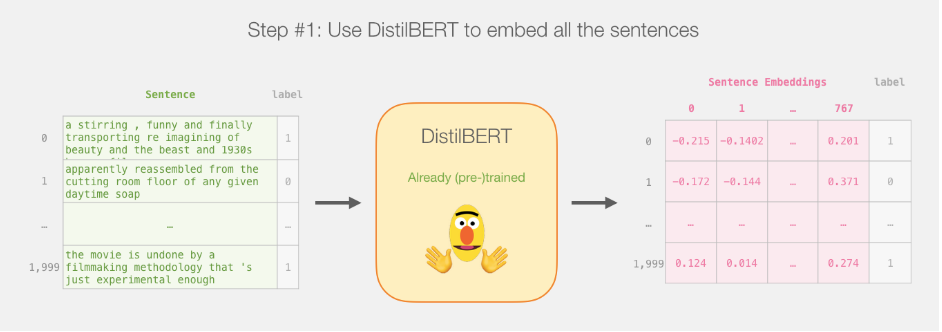

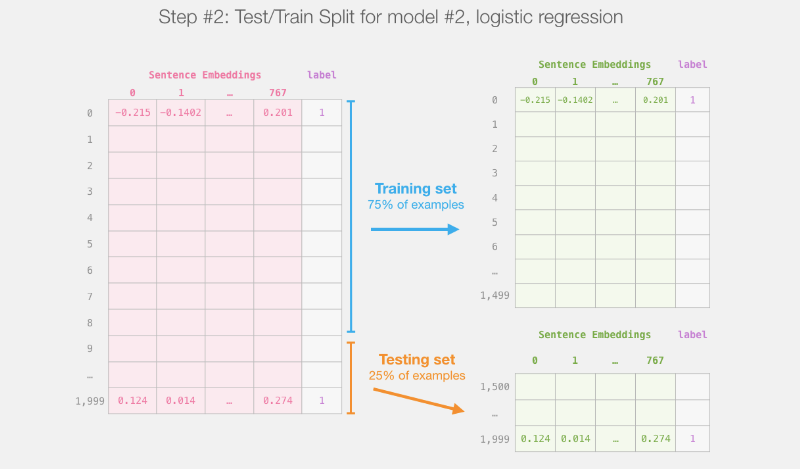

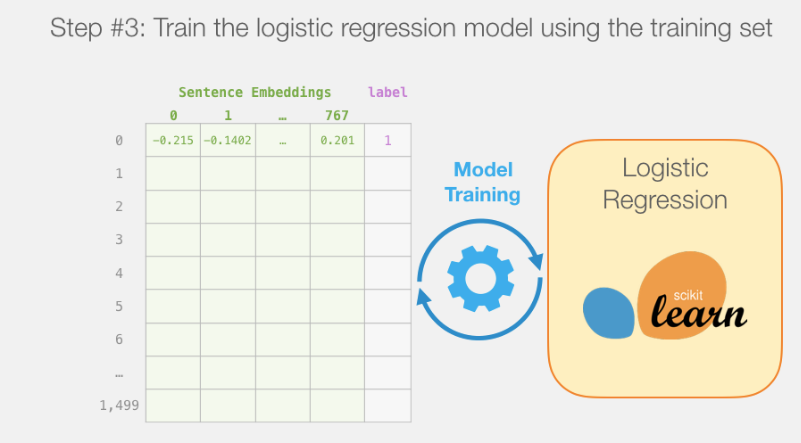

#### Let's have closer Look
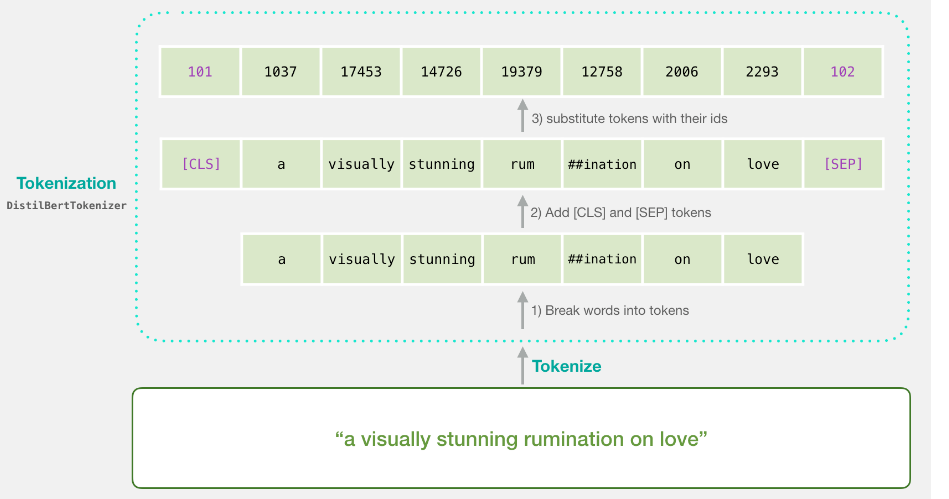

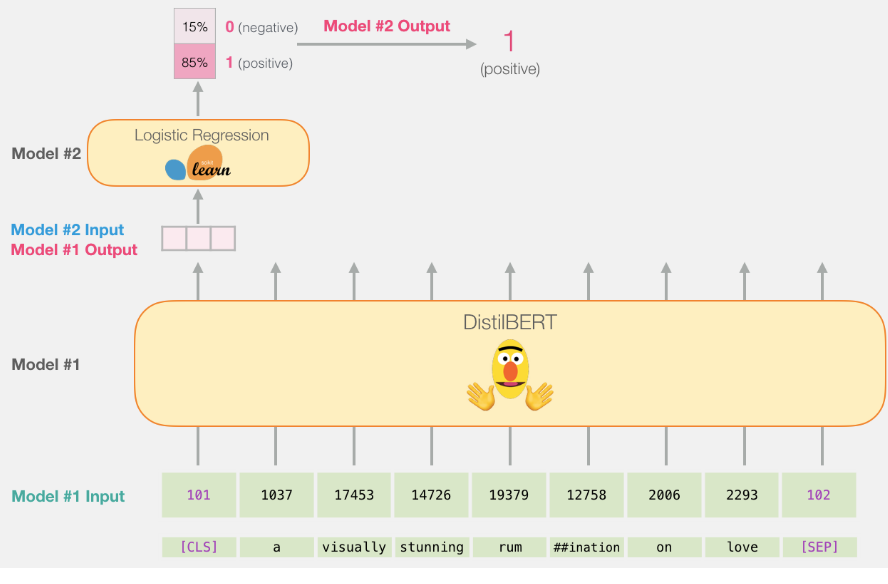


### Dataset
The dataset we will use in this example is [SST2](https://nlp.stanford.edu/sentiment/index.html), which contains sentences from movie reviews, each labeled as either positive (has the value 1) or negative (has the value 0):


<table class="features-table">
  <tr>
    <th class="mdc-text-light-green-600">
    sentence
    </th>
    <th class="mdc-text-purple-600">
    label
    </th>
  </tr>
  <tr>
    <td class="mdc-bg-light-green-50" style="text-align:left">
      a stirring , funny and finally transporting re imagining of beauty and the beast and 1930s horror films
    </td>
    <td class="mdc-bg-purple-50">
      1
    </td>
  </tr>
  <tr>
    <td class="mdc-bg-light-green-50" style="text-align:left">
      apparently reassembled from the cutting room floor of any given daytime soap
    </td>
    <td class="mdc-bg-purple-50">
      0
    </td>
  </tr>
  <tr>
    <td class="mdc-bg-light-green-50" style="text-align:left">
      they presume their audience won't sit still for a sociology lesson
    </td>
    <td class="mdc-bg-purple-50">
      0
    </td>
  </tr>
  <tr>
    <td class="mdc-bg-light-green-50" style="text-align:left">
      this is a visually stunning rumination on love , memory , history and the war between art and commerce
    </td>
    <td class="mdc-bg-purple-50">
      1
    </td>
  </tr>
  <tr>
    <td class="mdc-bg-light-green-50" style="text-align:left">
      jonathan parker 's bartleby should have been the be all end all of the modern office anomie films
    </td>
    <td class="mdc-bg-purple-50">
      1
    </td>
  </tr>
</table>



### Installing the transformers library
Let's start by installing the huggingface transformers library so we can load our deep learning NLP model.

In [29]:
!pip install transformers

     |████████████████████████████████| 1.3MB 3.5MB/s 
     |████████████████████████████████| 2.9MB 16.0MB/s 
     |████████████████████████████████| 1.1MB 29.1MB/s 
     |████████████████████████████████| 890kB 28.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=737e6ae46a6f7f2ecb3e1b0bfc10c18ba0a9cc6fdf1051cd785af274f476faad
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', delimiter='\t', header=None)

In [32]:
batch_1 = df[:2000]

In [33]:
batch_1[1].value_counts()

1    1041
0     959
Name: 1, dtype: int64

In [34]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [35]:
#Tokenization
#Our first step is to tokenize the sentences -- break them up into word and 
#subwords in the format BERT is comfortable with.

tokenized = batch_1[0].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [36]:
#Padding
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
np.array(padded).shape

(2000, 59)

In [37]:
#Masking
#If we directly send `padded` to BERT, that would slightly confuse it. 
#We need to create another variable to tell it to ignore (mask) the padding 
#we've added when it's processing its input. That's what attention_mask is:

attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(2000, 59)

In [38]:
#Getting vectors 
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

Let's slice only the part of the output that we need. That is the output corresponding the first token of each sentence. The way BERT does sentence classification, is that it adds a token called `[CLS]` (for classification) at the beginning of every sentence. The output corresponding to that token can be thought of as an embedding for the entire sentence.

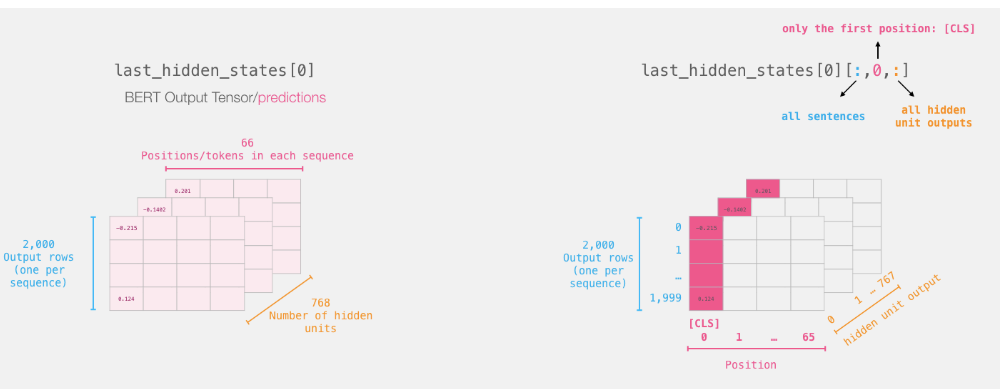

We'll save those in the `features` variable, as they'll serve as the features to our logitics regression model.

In [39]:
features = last_hidden_states[0][:,0,:].numpy()
labels = batch_1[1]

In [40]:
#train, test split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [41]:
lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
#evaluating model
lr_clf.score(test_features, test_labels)

0.854

# Introduction to contextual multi-lingual Embedding: mBERT
**Refrence**
1. https://huggingface.co/transformers/multilingual.html#bert
2. https://github.com/google-research/bert
3. https://github.com/neubig/lowresource-nlp-bootcamp-2020/blob/master/exercises/06-multilingual/mbert.ipynb

mBERT: BERT pre-trained from monolingual corpora in 104 languages

For more multilingual models please ref: https://huggingface.co/transformers/v2.2.0/multilingual.html

In [43]:
# for mBERT use 
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-multilingual-uncased')

# Fine-Tuning BERT for Text-Classification
###### Refrence: https://mccormickml.com/2019/07/22/BERT-fine-tuning/
## Advantages:
1. **Quicker Development:** 
- The pre-trained BERT model weights already encode a lot of information about our language.
- Tt takes much less time to train our fine-tuned model(take top layers of network and only need to gently tune). 
-In fact, the authors recommend only 2-4 epochs of training for fine-tuning BERT on a specific NLP task (compared to the hundreds of GPU hours needed to train the original BERT model or a LSTM from scratch!).
2. **Less Data:**
In addition and perhaps just as important, because of the pre-trained weights this method allows us to fine-tune our task on a much smaller dataset than would be required in a model that is built from scratch. A major drawback of NLP models built from scratch is that we often need a prohibitively large dataset in order to train our network to reasonable accuracy, meaning a lot of time and energy had to be put into dataset creation. By fine-tuning BERT, we are now able to get away with training a model to good performance on a much smaller amount of training data.
3. **Better Results:**
Finally, this simple fine-tuning procedure (typically adding one fully-connected layer on top of BERT and training for a few epochs) was shown to achieve state of the art results with minimal task-specific adjustments for a wide variety of tasks: classification, language inference, semantic similarity, question answering, etc. Rather than implementing custom and sometimes-obscure architetures shown to work well on a specific task, simply fine-tuning BERT is shown to be a better (or at least equal) alternative.

## **Working with the Hugging Face Library :**
**Reference:** 
1. Tranformer GitHub: https://github.com/huggingface/transformers
2. Website: https://huggingface.co/
3. Blogs: https://huggingface.co/blog  https://medium.com/huggingface
4. Poscost of Thomas Wolf(co-founder): https://www.youtube.com/watch?v=invR7r7c_pU 

This library contains interfaces for 1000+ pretrained language models like BERT, OpenAI’s GPT and GPT-2, etc. At the moment, the Hugging Face library seems to be the most widely accepted and powerful pytorch interface for working with BERT.

**Installing Tranformers**

In [44]:
!pip install transformers

In [45]:
#check for GPU access
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


## Working with CoLA Dataset
We’ll use The Corpus of Linguistic Acceptability (CoLA) dataset for single sentence classification. It’s a set of sentences labeled as **grammatically correct or incorrect**. It was first published in May of 2018, and is one of the tests included in the “GLUE Benchmark” on which models like BERT are competing.
Dataset Download Link: https://nyu-mll.github.io/CoLA/ 

In [46]:
#We’ll use the wget package to download the dataset to the Colab instance’s file system.
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=9d946f6eda2798f9edf873ae7a411553810993f5715025303279d634a8c353f5
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [47]:
#Downloading dataset
import wget
import os

print('Downloading dataset...')

# The URL for the dataset zip file.
url = 'https://nyu-mll.github.io/CoLA/cola_public_1.1.zip'

# Download the file (if we haven't already)
if not os.path.exists('./cola_public_1.1.zip'):
    wget.download(url, './cola_public_1.1.zip')

In [48]:
#Unzip the dataset to the file system. You can browse the file system of 
#the Colab instance in the sidebar on the left.

if not os.path.exists('./cola_public/'):
    !unzip cola_public_1.1.zip

Archive:  cola_public_1.1.zip
   creating: cola_public/
  inflating: cola_public/README      
   creating: cola_public/tokenized/
  inflating: cola_public/tokenized/in_domain_dev.tsv  
  inflating: cola_public/tokenized/in_domain_train.tsv  
  inflating: cola_public/tokenized/out_of_domain_dev.tsv  
   creating: cola_public/raw/
  inflating: cola_public/raw/in_domain_dev.tsv  
  inflating: cola_public/raw/in_domain_train.tsv  
  inflating: cola_public/raw/out_of_domain_dev.tsv  


In [49]:
#We can see from the file names that both tokenized and raw versions of the data are available.
#We can’t use the pre-tokenized version because, in order to apply the pre-trained BERT,
#we must use the tokenizer provided by the model. This is because
#(1) the model has a specific, fixed vocabulary and 
#(2) the BERT tokenizer has a particular way of handling out-of-vocabulary words.
#(3) has subword level tokenization

#We will use pandas for dataloading and pre-processing (provides simplicity). 
# An excellent tutorial link for learning pandas: https://www.youtube.com/watch?v=ZyhVh-qRZPA&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS

import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("./cola_public/raw/in_domain_train.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
#df.head()hea
#print(df.info)
df.sample(10)

Number of training sentences: 8,551



,sentence_source,label,label_notes,sentence
2875,l-93,1,NaN,I mixed the soap into the water.
3717,ks08,1,NaN,That Louise had abandoned the project surprise...
4798,ks08,1,NaN,In which box did he put the book?
1564,r-67,1,NaN,"If Jim feels good, he will go."
2902,l-93,1,NaN,I detached the handle.
4599,ks08,1,NaN,Why haven't any books been returned?
2534,l-93,1,NaN,The horse wouldn't budge.
3691,ks08,1,NaN,It is important for us to spend time with chil...
3513,ks08,0,*,He washed herself.
4894,ks08,1,NaN,Jack is the person with whom Jenny fell in love.


Lables are know as "acceptibility judgment” where 0=unacceptable and 1=acceptable. 

In [50]:
#Sample five sentences which are labeled as not grammatically acceptible.
df.loc[df.label == 0].sample(5)[['sentence', 'label']]

,sentence,label
999,Rich we have impeccable taste.,0
3166,Tessa sprained Mary 's ankle.,0
8181,Peter is owners of pigs.,0
1522,That the sun is out was obvious.,0
5307,1 put the book after the party on the table.,0


In [51]:
# Get the lists of sentences and their labels.
sentences = df.sentence.values
labels = df.label.values

##BERT Tokenizer
**Refrences for Different type of tokenization**
To feed our text to BERT, it must be split into tokens, and then these tokens must be mapped to their index in the tokenizer vocabulary.

The tokenization must be performed by the tokenizer included with BERT–the below cell will download this for us. We’ll be using the “uncased” version here

In [52]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [53]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  Our friends won't buy this analysis, let alone the next one we propose.
Tokenized:  ['our', 'friends', 'won', "'", 't', 'buy', 'this', 'analysis', ',', 'let', 'alone', 'the', 'next', 'one', 'we', 'propose', '.']
Token IDs:  [2256, 2814, 2180, 1005, 1056, 4965, 2023, 4106, 1010, 2292, 2894, 1996, 2279, 2028, 2057, 16599, 1012]


When we actually convert all of our sentences, we’ll use the `tokenize.encode` function to handle both steps, rather than calling `tokenize` and `convert_tokens_to_ids` separately.

## Required Formatting
1. Add special tokens to the start and end of each sentence.
2. Pad & truncate all sentences to a single constant length.
3. Explicitly differentiate real tokens from padding tokens with the “attention mask”.

## Special Tokens
- **[SEP] :** At the end of every sentence, we need to append the special [SEP] token.
- **[CLS] :** We must prepend the special [CLS] token to the beginning of every sentence. This token has special significance. BERT consists of 12 Transformer layers. Each transformer takes in a list of token embeddings, and produces the same number of embeddings on the output (but with the feature values changed, of course!). On the output of the final (12th) transformer, only the first embedding (corresponding to the [CLS] token) is used by the classifier.

**Note :**
- “The first token of every sequence is always a special classification token ([CLS]). The final hidden state corresponding to this token is used as the aggregate sequence representation for classification tasks.” (from the BERT paper)
- The  pooling strategy over the final embeddings of 768 dim is not needed

## Sentence Length & Attention Mask
- All sentences must be padded or truncated to a single, fixed length.
- The maximum sentence length is 512 tokens for BERT
- Padding is done with a special [PAD] token, which is at index 0 in the BERT vocabulary
- The maximum length does impact training and evaluation speed, however. For example, with a Tesla K80:
   - MAX_LEN = 128 --> Training epochs take ~5:28 each
   - MAX_LEN = 64 --> Training epochs take ~2:57 each
- The “Attention Mask” is simply an array of 1s and 0s indicating which tokens are padding and which aren’t (seems kind of redundant, doesn’t it?!). This mask tells the “Self-Attention” mechanism in BERT not to incorporate these PAD tokens into its interpretation of the sentence.

In [54]:
#The transformers library provides a helpful `encode` function which will handle
#most of the parsing and data prep steps for us.

#Finding max length
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)


Max sentence length:  47


Let take maximum length to 64

The `tokenizer.encode_plus` function combines multiple steps for us:
1. Split the sentence into tokens.
2. Add the special [CLS] and [SEP] tokens.
3. Map the tokens to their IDs.
4. Pad or truncate all sentences to the same length.
5. Create the attention masks which explicitly differentiate real tokens from [PAD] tokens.

The first four features are in `tokenizer.encode`, but we will use `tokenizer.encode_plus`
to get the fifth item (attention masks). Documentation is here: https://huggingface.co/transformers/main_classes/tokenizer.html?highlight=encode_plus#transformers.PreTrainedTokenizer.encode_plus

In [55]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Original:  Our friends won't buy this analysis, let alone the next one we propose.
Token IDs: tensor([  101,  2256,  2814,  2180,  1005,  1056,  4965,  2023,  4106,  1010,
         2292,  2894,  1996,  2279,  2028,  2057, 16599,  1012,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


In [56]:
#Training & Validation Split
#Divide up our training set to use 90% for training and 10% for validation.

from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

7,695 training samples
  856 validation samples


In [62]:
#We’ll also create an iterator for our dataset using the torch DataLoader 
#class. This helps save on memory during training because, unlike a for 
#loop, with an iterator the entire dataset does not need to be loaded into memory.

from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

Here is the current list of classes provided for fine-tuning:
- BertModel
- BertForPreTraining
- BertForMaskedLM
- BertForNextSentencePrediction
- BertForSequenceClassification - The one we’ll use.
- BertForTokenClassification
- BertForQuestionAnswering
The documentation for these can be found under here: https://huggingface.co/transformers/v2.2.0/model_doc/bert.html

We’ll be using BertForSequenceClassification. This is the normal BERT model with an added single linear layer on top for classification that we will use as a sentence classifier. As we feed input data, the entire pre-trained BERT model and the additional untrained classification layer is trained on our specific task.

In [57]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [58]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [59]:
#Batch size: 32
#Learning rate (Adam): 2e-5
#Number of epochs: 4
#eps = 1e-8,  very small number to prevent any division by zero in the implementation

# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [63]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

## Training and Evaluation Steps

**Training:**
1. Unpack our data inputs and labels
2. Load data onto the GPU for acceleration
3. Clear out the gradients calculated in the previous pass.
4. In pytorch the gradients accumulate by default (useful for things like RNNs unless you explicitly clear them out.
5. Forward pass (feed input data through the network)
6. Backward pass (backpropagation)
7. Tell the network to update parameters with optimizer.step()
8. Track variables for monitoring progress

**Evalution:**
1. Unpack our data inputs and labels
2. Load data onto the GPU for acceleration
3. Forward pass (feed input data through the network)
4. Compute loss on our validation data and track variables for monitoring progress
Pytorch hides all of the detailed calculations from us, but we’ve commented the code to point out which of the above steps are happening on each line.

In [64]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [65]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

  # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()
    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()
        # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()
    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
         {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))



======== Epoch 1 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:13:45.
  Batch    80  of    241.    Elapsed: 0:27:30.


In [ ]:
Let’s view the summary of the training process.

import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

## Other Relevent and impotant Tutorials links 
1. Saving and Loading fine-tuned models: https://mccormickml.com/2019/07/22/BERT-fine-tuning/
2. Weight decay: https://mccormickml.com/2019/07/22/BERT-fine-tuning/
3. https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
4. https://huggingface.co/transformers/training.html  